<hr/>

# Data Mining

09/12/2019

**Hanyao(Amy) Qiu** - hqiu11@jhu.edu <br/>
**Office Hour** - F 10:30am ~ 11:30am $~$ Whitehead 212 (Whitehead Hall Second Level Common Area) <br/>
**Section**$~~~~~~$ - Th 4:30pm ~ 5:20pm $~~~$ Shaffer 302
<br>

## Section 2 

- **Sampling from Distributions**: Inverse transform sampling, Rejection sampling 
- **Sample Estimates**: Sample mean, Sample Variance
- **Density Estimation**: Histogram, Kernel Density Estimation
- **Method of Least Squares**: unhomework
<hr/>

###  1. Sampling from Distributions

#### 1.1  Inverse transform sampling in $\mathbb{R}$

>$\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $

> **Unhomework:** Prove it!

> Suppose the CDF of $X$ is $F(x)$, $U$ is uniformly distributed on $(0,1)$. 
Then the CDF of $Y=F^{-1}(U)$ is also $F$.

> **Proof:**
    \begin{eqnarray}
        \mathbb{P}(Y\leq x) &=& \mathbb{P}(F^{-1}(U) \leq x) \\
                  &=& \mathbb{P}(U \leq F(x)) \;\;\; \text{ applying F to both side } \\
                  &=& F(x) \;\;\; \text { bacause } P(U\leq y)=y \text{ when U is uniform on (0,1)}
    \end{eqnarray}
    
- Inverse transform sampling method: 

> (1) Generate random number $U$ from the standard uniform distribution in the interval [0,1]

> (2) Find the inverse of the desired CDF 

> (3) Compute $X=F^{-1}(U)$, then random variable $X$ has distribution $F$

- Example: Exponential Distribution $F_{X}(x) = 1-e^{-\lambda x}$, $x\geq 0$

> Find the inverse CDF: $x = F^{-1}(y)= -\frac{1}{\lambda}\log(1-y)$

> Generate $U$ from $\text{Unif}(0,1)$, then $X = F^{-1}(U) = -\frac{1}{\lambda}\log(1-U)$ has exponential distribution
 

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Inverse transform sampling 
lambda_ = 1 
U = random.uniform(0, 1, 1000)
X = -1/lambda_*log(1-U) 

In [3]:
# Exponential distribution
Y = numpy.random.exponential(1, 1000)

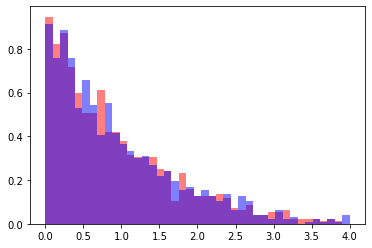

In [4]:
# Compare the results
hist(X, bins = 41, range=[0,4], color='r', alpha=0.5, density=1);
hist(Y, bins = 41, range=[0,4], color='b', alpha=0.5, density=1);

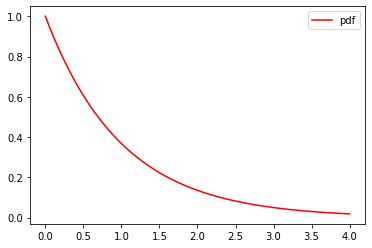

In [5]:
x = np.linspace(0,4,1000)
exponential = lambda_*np.exp(-lambda_*x)
plot(x, exponential, 'r')
legend(['pdf','inverse transform samples']);

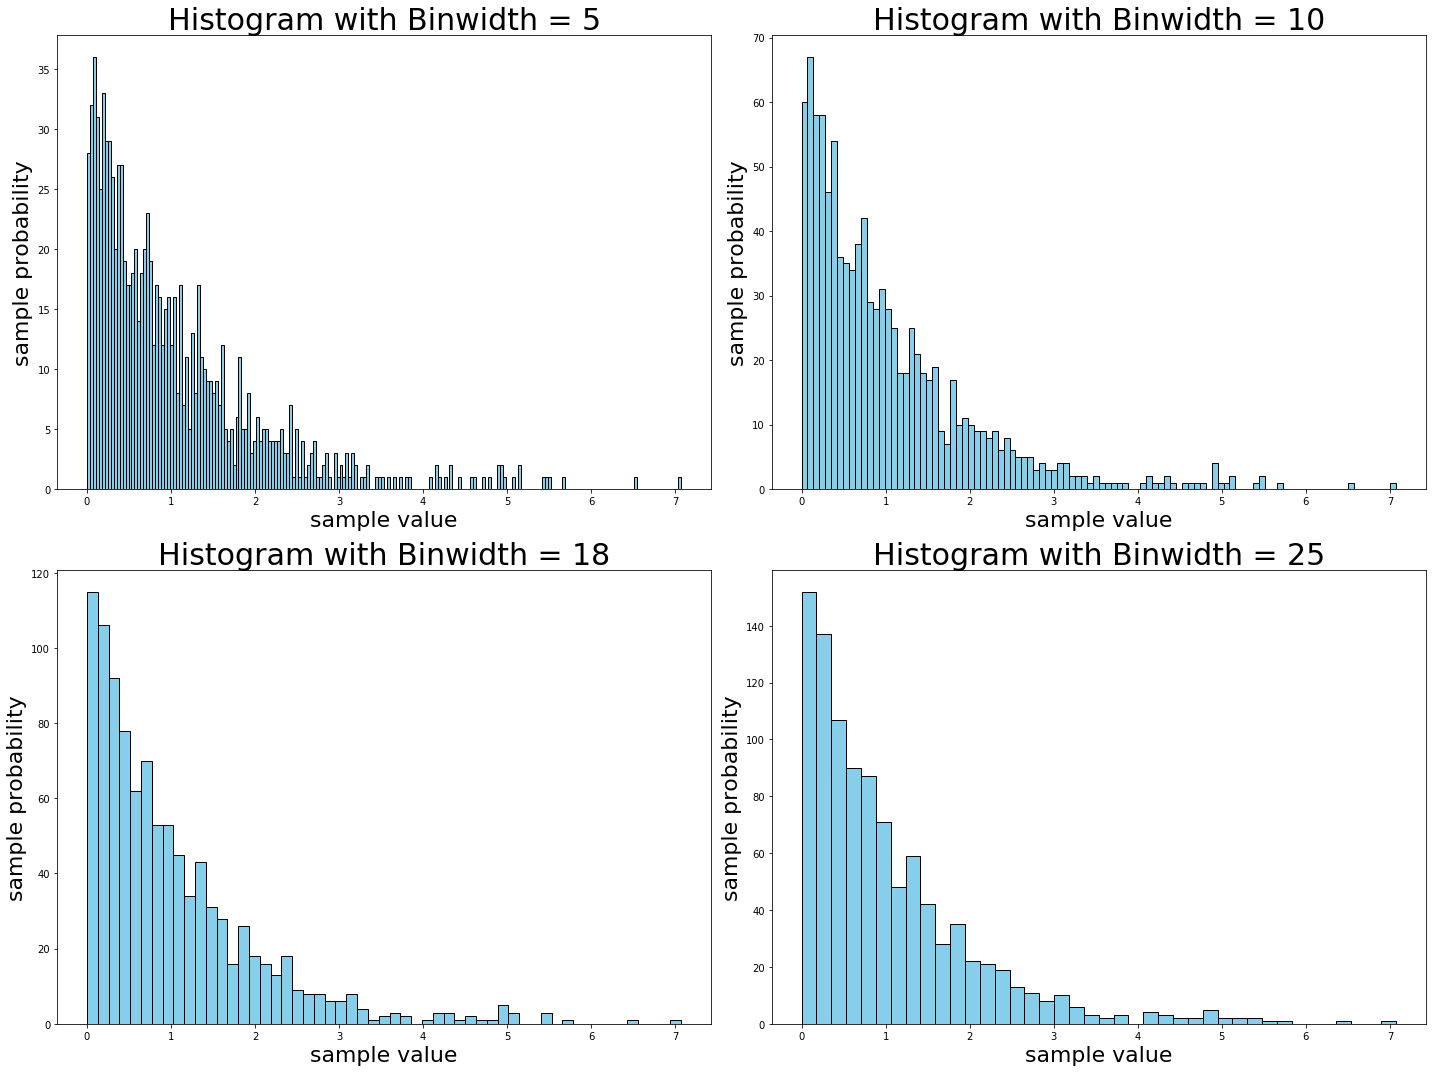

In [6]:
# Show 4 different binwidths
plt.figure(figsize=(20,15))
for i, binwidth in enumerate([5, 10, 18, 25]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(X, bins = int(1000/binwidth),
             color = 'skyblue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('sample value', size = 22)
    ax.set_ylabel('sample probability', size= 22)

plt.tight_layout()
plt.show()

#### 1.2 Rejection sampling - also works in  $\mathbb{R}^{N}$

Given a density of interest $f$, find an envelope density $g$ and a constant $M$ such that: 

\begin{eqnarray}
    f(x) \leq M g(x)
\end{eqnarray}

on the support of f .

- Rejection sampling algorithm 

> (1) Generate $X \sim g$ and $U \sim \text{Unif}(0,1)$

> (2) Accept $Y = X$ if $U \leq \frac{f(x)}{Mg(x)}$, and reject otherwise

> (3) Then $Y$ will follow the distribution with denfity $f$

- Remarks

> (1) We can show that the probability of acceptance is $P\left(U \leq \frac{f(x)}{Mg(x)}\right) = \frac{1}{M}$. 

> (2) Hence, $M$ should be kept as small as possible. In general, $M = \sup_{x}\left(\frac{f(x)}{g(x)}\right)$.

> (3) $g$ must be simple (e.g., uniform, normal) and must have heavier tails than $f$


### Exercise: unhomework Lecture3-part(a)

***(a). Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different $(\mu_1, \sigma_1)$ and $(\mu_2,\sigma_2$) values!***<br>
(b). Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.

- Sampling

> Mixture of two Gaussians: $X \sim p\mathcal{N}(\mu_1, \sigma_1^2)+(1-p)\mathcal{N}(\mu_2, \sigma_2^2)$

> Note: Since the CDF of a mixure of Gaussians is complicated, we don't use inverse transform method directly. We use inverse transform to generate standard Gaussians, then transform and mix them. 

> Once we got a sample $Z$ from standard Gaussian, we can get a sample from $N(\mu,\sigma^2)$ by $\mu+\sigma Z$.

#### method 1 (Using inverse transform)

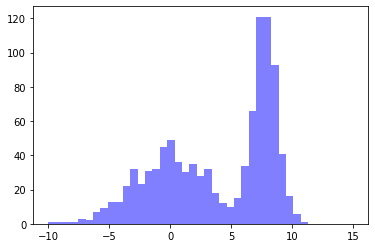

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as Gaussian
from scipy.stats.kde import gaussian_kde

mu, sigma, p = [0,8], [3,1], 0.5 # values of parameters

N = 1000
U = np.random.rand(N)  # uniform random numbers for inverse transform
X = Gaussian.ppf(U)  # standard Gaussian random numbers using inverse transform
V = np.random.rand(N)  # uniform random numbers for choosing populations

X[V<=p] = mu[0] + sigma[0] * X[V<=p]  # if V <= p then X = mu[0]+sigma[0]*Z, where Z is standard Gaussian
X[V>p] = mu[1] + sigma[1] * X[V>p]

hist(X, 41, range=[-10,15], color='b', alpha=0.5); # the histogram of mixture of Gaussians

In [7]:
X = Gaussian.ppf(U) 
V<=p;

In [8]:
#print(X[V<=p])
#print(np.shape(X[V<=p]))

#### method 2: using Rejection samping 

If we samples from a mixture of two Gaussians.

$$ \displaystyle \qquad f(x) = \frac{1}{2} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x+2)^2}{2}\right] + \frac{1}{2} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x-2)^2}{2}\right] $$

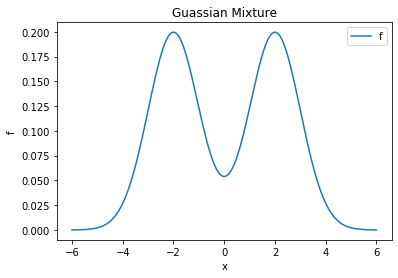

In [10]:
x = np.linspace(-6,6,1000)
f = lambda x: (1/2) * (1/np.sqrt(2*np.pi)) * np.exp(-(x+2)**2/2) \
              + (1/2) * (1/np.sqrt(2*np.pi)) * np.exp(-(x-2)**2/2)
plot(x, f(x));
xlabel('x'); ylabel('f');
title('Guassian Mixture');
legend(['f']);

CPU times: user 25.2 ms, sys: 2.03 ms, total: 27.2 ms
Wall time: 26.1 ms


4063

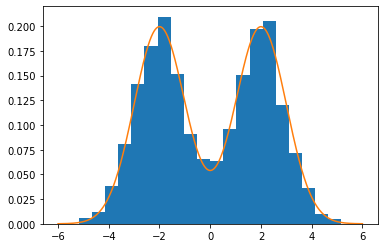

In [11]:
%%time

z = np.random.uniform(-6, 6, 10000)
u = np.random.uniform(0, 1, 10000) 
k = max(f(x)/(1/12))
samples = z[u <= (f(z) / (k*(1/12)))]

hist(samples, bins=20,density = True);
x = np.linspace(-6,6,1000)
plot(x, f(x));

size(samples)

### Further Exercise

- Draw random samples from a bivariate normal distribution with 

> $\displaystyle \quad \mu = \begin{bmatrix} 1 \\ 1\end{bmatrix} \quad$ 
> and 
> $\displaystyle \quad C = \begin{bmatrix} 4 & -1 \\ -1 & 4\end{bmatrix}$

 0. Generate a set of random 2-vectors that are uniformly distributed on a square around $\mu$ and plot the results (2 pts)
 0. Use rejection sampling to subset these uniform randoms (2 pts)
 0. Revise the initial sample to have about 300 points and plot them (1 pt)
 0. Plot the results (1 pt)

Total of 6 points

### 2.Sample mean and  Sample variance

Suppose $\textit{x}=(x_1, x_2, ..., x_N)$ is a sample of size N, 
from a distribution with mean $\mathbb{E}[x]=\mu$ and vairance $\mathbb{Var}[x]=\sigma^2$

- Sample mean: $$\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$

- Sample variance $$\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$$

> Note: The denominator of the sample variance is (N-1) instead of N, because it is an unbiased estimate of population variance. i.e., $E(s^2) = \sigma^2$.

> **Proof:** Since
    \begin{eqnarray}
        \mathbb{E}[(x_1-\bar{x})^2] &=& \mathbb{E}[ \left((x_1-\mu)-(\bar{x}-\mu)\right)^2 ] \\
         &=& \mathbb{E}[ (x_1-\mu)^2]-2\mathbb{E}[(x_1-\mu)(\bar{x}-\mu)]+\mathbb{E}[(\bar{x}-\mu)^2] 
    \end{eqnarray}

> where $\mathbb{E}[(x_1-\mu)^2]=\mathbb{Var}[x_1]=\sigma^2$, $\mathbb{E}[(\bar{x}-\mu)^2]=\mathbb{Var}[\bar{x}]=\frac{\sigma^2}{N}$ and 

> \begin{eqnarray}
   \mathbb{E}[(x_1-\mu)(\bar{x}-\mu)] &=& \frac{1}{N}\sum_{i=1}^N \mathbb{E}[(x_1-\mu)(x_i-\mu)] \\
      &=& \frac{1}{N} \left( \mathbb{Cov}(x_1,x_1) + \mathbb{Cov}(x_1,x_2) + \dots \mathbb{Cov}(x_1,x_N) \right) \\
      &=& \frac{1}{N} (\sigma^2 +0 +\dots + 0) \\
      &=& \frac{\sigma^2}{N}
\end{eqnarray}

> Then we have $\mathbb{E}[(x_1-\bar{x})^2] = \sigma^2 - \frac{2\sigma^2}{N} + \frac{\sigma^2}{N} = \frac{N-1}{N}\sigma^2$, so $\mathbb{E}[s^2]=\frac{1}{N-1}\cdot N \cdot\mathbb{E}[(x_1-\bar{x})^2] = \sigma^2$.

### 3. Density Estimation

> Histograms and Kernel Density Estimation (KDE)

- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) = \frac{1}{N}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
    - Can use different $K(\cdot)$ kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov


### Exercise: unhomework Lecture3 - part (b)

(a). Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different $(\mu_1, \sigma_1)$ and $(\mu_2,\sigma_2$) values!<br>
***(b). Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.***

***method1*** 

In [32]:
def Gaussian_kernel(x):
    return np.exp(-(x-np.mean(x))**2/2) / (2*np.pi)**(1/2)

def kernel_density_estimator(U, X, h):
    return np.mean(Gaussian_kernel((U-X[newaxis,:])/h), axis = 1) / h

In [33]:
size(samples)

4063

In [39]:
samples = np.array(samples)
U = np.linspace(-6, 6, samples.shape[0]).reshape(-1,1)
size(U)

4063

(4063, 4063)

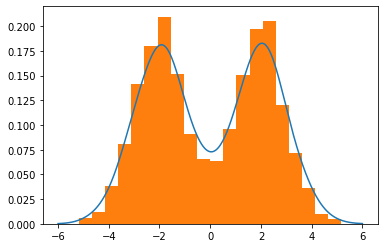

In [40]:

f_u = kernel_density_estimator(U, samples, 0.5)

plot(U,f_u)
hist(samples, bins=20, density=True)


size(U),size(samples)

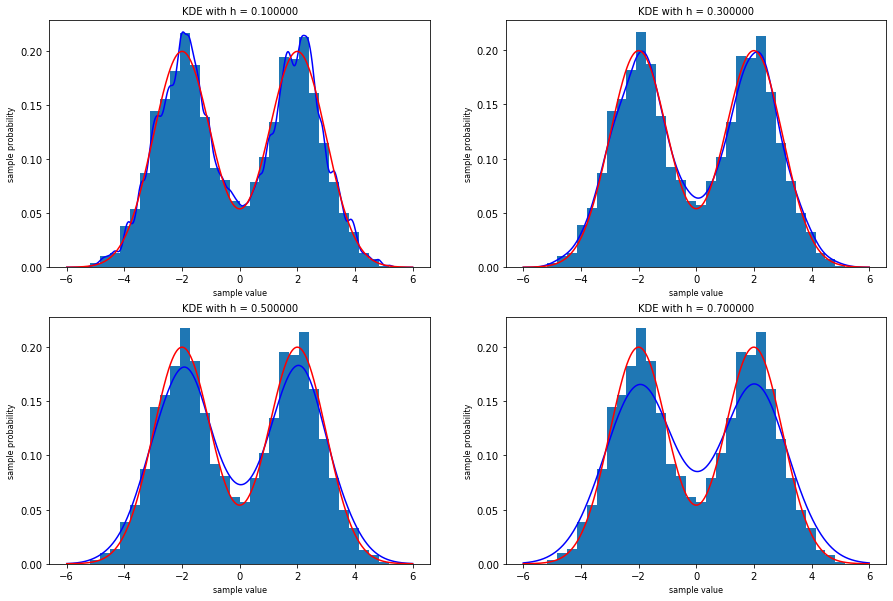

In [16]:
# Show 4 different binwidths
plt.figure(figsize=(15,10))
f = lambda x: (1/2) * (1/np.sqrt(2*np.pi)) * np.exp(-(x+2)**2/2) \
              + (1/2) * (1/np.sqrt(2*np.pi)) * np.exp(-(x-2)**2/2)

for i, h in enumerate([0.1, 0.3, 0.5, 0.7]):    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    f_u = kernel_density_estimator(U, samples, h)
    ax.plot(U,f_u,'b')
    ax.plot(U,f(U),'r')
    ax.hist(samples, bins=30, density=True)
    # Title and labels
    ax.set_title('KDE with h = %f' %h, size = 10)
    ax.set_xlabel('sample value', size = 8)
    ax.set_ylabel('sample probability', size= 8)
plt.show()



***method 2***

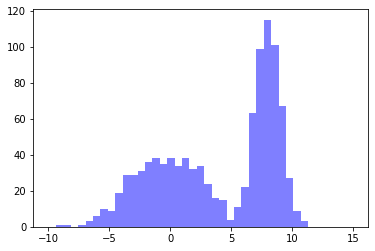

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as Gaussian
from scipy.stats.kde import gaussian_kde

mu, sigma, p = [0,8], [3,1], 0.5 # values of parameters

N = 1000
U = np.random.rand(N)  # uniform random numbers for inverse transform
X = Gaussian.ppf(U)  # standard Gaussian random numbers using inverse transform
V = np.random.rand(N)  # uniform random numbers for choosing populations

X[V<=p] = mu[0] + sigma[0] * X[V<=p]  # if V <= p then X = mu[0]+sigma[0]*Z, where Z is standard Gaussian
X[V>p] = mu[1] + sigma[1] * X[V>p]

hist(X, 41, range=[-10,15], color='b', alpha=0.5); # the histogram of mixture of Gaussians

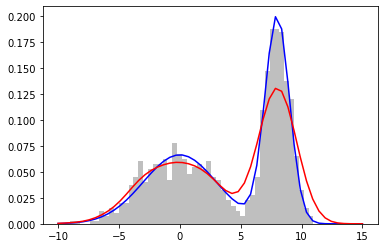

In [18]:
kde = gaussian_kde(X) # KDE from scipy 
xx = np.linspace(-10,15)
pdf = p*Gaussian(mu[0],sigma[0]).pdf(xx)+(1-p)*Gaussian(mu[1],sigma[1]).pdf(xx) # pdf of mixture of gaussians

plt.plot(xx, pdf, 'b'); 
plt.plot(xx, kde(xx), 'r'); 
plt.hist(X, density=1, bins=50, color='grey', alpha=0.5); 

###  4. Method of Least Squares

#### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}_{i=1}^{N}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

> Estimation: $\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Simple Fitting

> A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b x$
  
> $\displaystyle \hat{\boldsymbol\theta} = \arg\min_{\theta} \sum_i \big[y_i-(a + b x_i)\big]^2$

> **Unhomework:** Derive the best fit parameters of $(a,b)$

> **Solution:** Let 
\begin{eqnarray}
        Q = \sum_i \big[y_i-(a + b x_i)\big]^2
\end{eqnarray}
take derivatives with resepect to $a$ and $b$, and set them to be $0$, we have
  \begin{eqnarray}
        \frac{\partial Q}{\partial a} &=& -2 \sum_i (y_i-(a+b x_i)) = 0 \\
        \frac{\partial Q}{\partial b} &=& -2 \sum_i x_i(y_i-(a+b x_i)) = 0
   \end{eqnarray}
which is eqaul to 
    \begin{eqnarray}
        \sum_i y_i &=& aN + b \sum_i x_i \\ 
        \sum_i x_i y_i &=& a\sum_i x_i + b \sum_i x_i^2
   \end{eqnarray}
By solving the above two equations, we can obtain
    \begin{eqnarray}
        \hat{a} &=& \bar{y} - \hat{b}\bar{x} \\
        \hat{b} &=& \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2} 
        = \frac{N\sum_i x_i y_i - (\sum_i x_i)(\sum_i y_i)}{N\sum_i x_i^2 - (\sum_i x_i)^2}
   \end{eqnarray}
where $\bar{x}=\frac{1}{N}\sum_i x_i$ and $\bar{y}=\frac{1}{N}\sum_i y_i$.

- Matrix Version

> Find $\hat{\beta} = [\hat{a}, \hat{b}]^T$ minimize 
 \begin{eqnarray}
     Q &=& \sum_i \big[y_i-(a + b x_i)\big]^2 \\
     &=& (y - X\beta)^T(y - X\beta) \\
     &=& y^T y - y^T X\beta - \beta^T X^T y + \beta^T X^T X\beta
 \end{eqnarray}

> Similarly, computing the partial derivatives of $Q$ with respect to $\beta$ and setting it to $0$ gives
 \begin{eqnarray}
     \frac{\partial Q}{\partial \beta} = -2X^T y + 2 X^T X\beta = 0 
 \end{eqnarray}
 and thus $\hat{\beta} = (X^T X)^{-1}X^Ty $.

### Exercise: Unhomework Lecture 4

0. Fit a 3rd order polynomial to the same data

0. Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

0. Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

0. Plot them in one figure

[-10.32574185  -1.86917458   0.92978958  -5.86462267   3.15928831
  -9.0182238  -10.11794043   2.10402369   4.01386783  -9.27299723
 -10.58407339   4.44960542  -6.09777768   1.2533618   -8.36375901
  -7.63507198   0.66390394  -3.38991237 -10.48815363  -8.12167925
  -9.92054405   3.557286    -1.15756783 -10.51055874   4.28749333
  -7.34229039  -9.44174301  -8.66262725   6.09008454  -0.44615408
  -5.02972959  -5.1448075   -9.27934962  -7.76530046  -1.23444877
   1.44430317  -8.53517227  -7.08692468  -6.75915426  -8.62513559
   2.15773917 -11.35245136 -10.02912501  -6.15703233   2.72773645
  -6.02603007  -3.90550449  -8.87998253  -0.08948451  -0.76918151]


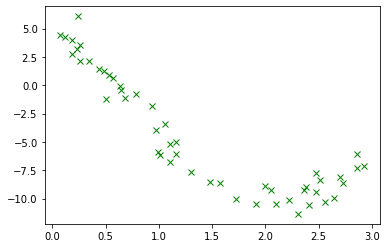

In [19]:
# Generate sample with error
x = 3 * random.rand(50) # between 0 and 3
e = 1 * random.randn(x.size) # noise
# y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*cos(x+1) + e;  plot(x,y,'gx');
disp(y)

[ -9.24201859  -3.65088331   0.27702331  -4.19403933   3.44978446
  -9.92896588 -10.21978813   3.17279573   3.97396991 -10.18877908
  -9.8499854    5.11630949  -5.65569493   0.78872568  -9.45198291
  -6.73807686  -0.02564496  -4.76372606 -10.23439467  -8.38367529
  -8.72556035   3.1366188   -1.18622516  -9.92424806   4.65443204
  -7.05824194  -9.61479636  -8.5356119    3.35290809  -0.85938089
  -5.67856991  -5.14430333  -9.98423742  -9.61833035   0.56186668
   1.2933289   -8.01091997  -6.34306628  -5.22128267  -8.14151866
   2.30277687 -10.11717227  -9.2672533   -4.31923914   3.89381119
  -6.99578891  -4.03216209 -10.10628194  -0.77176537  -2.25168403]
1.070485002250308


array([  5.8442302 , -10.16537704,  -0.96862723,   1.03031438])

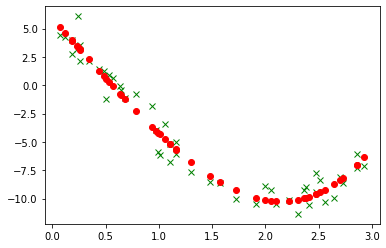

In [20]:
# 1. Fit a 3rd order polynomial to the same data: f(x) = b0 + b1 x + b2 * x^2 + b3 * x^3
X = ones((x.size,4));
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3
Xpinv = dot(inv(dot(X.T,X)),X.T)    
bHat1 = dot(Xpinv,y)
yHat1 = dot(X,bHat1)
disp(yHat1)
mse1 = sum(square(y-yHat1))/(x.size-bHat1.size)

print(mse1)
plot(x,y,'gx'); plot(x,yHat1,'ro'); bHat1

1.0146958397906405


array([-8.5500327 ,  5.41850476])

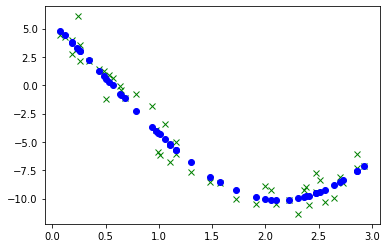

In [21]:
# 2. Fit f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) 
X = ones((x.size,2)); 
X[:,0] = sin(x)
X[:,1] = cos(x)
Xpinv = dot(inv(dot(X.T,X)),X.T)     
bHat2 = dot(Xpinv,y)
yHat2 = dot(X,bHat2)

mse2 = sum(square(y-yHat2))/(x.size-bHat2.size)

print(mse2)
plot(x,y,'gx'); plot(x,yHat2,'bo'); bHat2

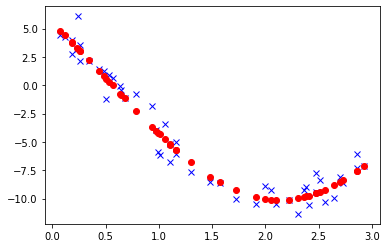

In [22]:
import math
Y=np.ones((x.size,2))
Y[:,0]= sin(x)
Y[:,1]= cos(x)
Ypinv = np.dot(np.linalg.inv(np.dot(Y.T,Y)),Y.T)
bHat = np.dot(Ypinv,y)
yHat = np.dot(Y,bHat)
plot(x,y,'bx')
plot(x,yHat,'ro')

In [23]:
print('''mse comparison:  
      f(x) = b0 + b1 x + b2 * x^2 + b3 * x^3 : %f
      f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) :%f'''%(mse1,mse2))

mse comparison:  
      f(x) = b0 + b1 x + b2 * x^2 + b3 * x^3 : 1.070485
      f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) :1.014696


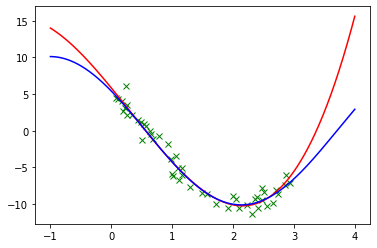

In [24]:
# 3. Evaluate on a grid of 1000 equally-spaced points in [−1,4]
x_1000 = np.linspace(-1,4,1000)

X1_1000 = ones((x_1000.size, 4))
X1_1000[:,1] = x_1000
X1_1000[:,2] = x_1000**2
X1_1000[:,3] = x_1000**3


X2_1000 = ones((x_1000.size, 2))
X2_1000[:,0] = sin(x_1000)
X2_1000[:,1] = cos(x_1000)

yHat1_1000 = dot(X1_1000, bHat1)
yHat2_1000 = dot(X2_1000, bHat2)



# 4. Plot them in one figure
plot(x,y,'gx'); 
plot(x_1000,yHat1_1000,'r')
plot(x_1000,yHat2_1000,'b')


#### Attention, please! 


***1. what is the meaning of linear in this case?***


- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $
> <br/><br/>


***2. the problem of underfitting and overfitting***

Underfitting and Overfitting in Machine Learning
Let us consider that we are designing a machine learning model. A model is said to be a good machine learning model, if it generalizes any new input data from the problem domain in a proper way. This helps us to make predictions in the future data, that data model has never seen.

Now, suppose we want to check how well our machine learning model learns and generalizes to the new data. For that we have overfitting and underfitting, which are majorly responsible for the poor performances of the machine learning algorithms.

Underfitting:
A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have less data to build an accurate model and also when we try to build a linear model with a non-linear data. In such cases the rules of the machine learning model are too easy and flexible to be applied on such a minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

Overfitting:
A statistical model is said to be overfitted, when we train it with a lot of data (just like fitting ourselves in an oversized pants!). When a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too much of details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees.

[material](http://geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)